<a href="https://colab.research.google.com/github/Y4S1-Deep-Learning/Leaf-Desease-Detection---Supervised-Learning/blob/prathibha/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leaf Disease Detection using YOLO v8**



### **Install YOLO v8**

In [1]:
# Install the ultralytics package from PyPI
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 10.0 MB/s eta 0:00:00


### **Install Libraries**

In [2]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

### **Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Unzip Files**

In [4]:
!unzip '/content/drive/MyDrive/yolov8/yolov8.zip'

Streaming output truncated to the last 5000 lines.
  inflating: yolov8/test/images/IMG_1629_JPG_1507122477_jpg.rf.edefbfe10e7853ccfc140e185210c4af.jpg  
  inflating: yolov8/test/images/IMG_42231_jpg.rf.ba52a53022b2dcb1b139ac35f2790991.jpg  
  inflating: yolov8/test/images/IMG_5808_jpg.rf.38d9d71c5d81b5a744eb70f26aa15cb1.jpg  
  inflating: yolov8/test/images/irish-blight-symptoms-on-potato-leaves-atmf8b_jpg.rf.a78788696ec665018a6975cb04510f98.jpg  
  inflating: yolov8/test/images/iron-deficiency-raspberry-leaf-chlorosis-isolated-32457798_jpg.rf.51961fc3b431ad288d20b1bd9a8b0858.jpg  
  inflating: yolov8/test/images/LateBlight04_jpg.rf.18c15c5b49ea0798d9977c3d0467620b.jpg  
  inflating: yolov8/test/images/LateBlt09_06_jpg.rf.64e7ff8ffa73fabfdd8f35f12b80db52.jpg  
  inflating: yolov8/test/images/latest_cb=20100621160325_jpg.rf.3be51ab4ac8519475172e1546926bbe7.jpg  
  inflating: yolov8/test/images/late_blight_tomato_leaf_spore1x1200_jpg.rf.468d0f72d833b2cabeae673927d966eb.jpg  
  inflating:

### **Preprocess the data**

In [5]:
from PIL import Image
import os

# Define the paths
input_folder = '/content/yolov8/train/images'
output_folder = '/content/yolov8/data/train/images'

# Define the desired image size
desired_image_size = (416, 416)

# Function to resize images
def resize_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            image = image.resize(desired_image_size)  # Resize images

            # Save the resized image
            output_image_path = os.path.join(output_folder, filename)
            image.save(output_image_path)

# Resize images
resize_images(input_folder, output_folder)


### **Checking Ultralytics installation and dependencies**

In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


### **Training the model**

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/yolov8/data.yaml epochs=50 imgsz=416 batch=8 project=/content/drive/MyDrive/yolov8/training_results name=leave_deseases

100% 21.5M/21.5M [00:00<00:00, 169MB/s]
Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolov8/data.yaml, epochs=50, patience=50, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=leave_deseases, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=F

### **Inferencing**

In [8]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/leave_deseases4/weights/best.pt conf=0.35 source=/content/yolov8/test_images

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137194 parameters, 0 gradients, 28.5 GFLOPs

image 1/10 /content/yolov8/test_images/512_fig_1_entomosporium_leaf_spot_on_peachjpg(1).jpg: 416x416 2 Apple Scab Leafs, 10.5ms
image 2/10 /content/yolov8/test_images/Frogeye-spots-Botryosphaeria-obtusa-on-apple-leaf-FB(1).jpg: 416x416 1 Apple rust leaf, 10.6ms
image 3/10 /content/yolov8/test_images/Soyabean leaf(1).jpg: 416x416 1 Apple rust leaf, 10.5ms
image 4/10 /content/yolov8/test_images/Strawberry-Plant-Disease(1).jpg: 416x416 2 Strawberry leafs, 10.5ms
image 5/10 /content/yolov8/test_images/Strawberry-Plant-Diseases-Problems-Caused-by-Bacteria-Fungi-Molds-Viruses-fb(1).jpg: 416x416 3 Strawberry leafs, 10.5ms
image 6/10 /content/yolov8/test_images/Three-types-of-grape-leaf-diseases-along-with-healthy-leaf-9(1).jpg: 416x416 1 grape leaf black rot, 3 grape leafs, 10.5ms
image 7/10 /content/yolov8/test_images/corn-d

### **Display the results**

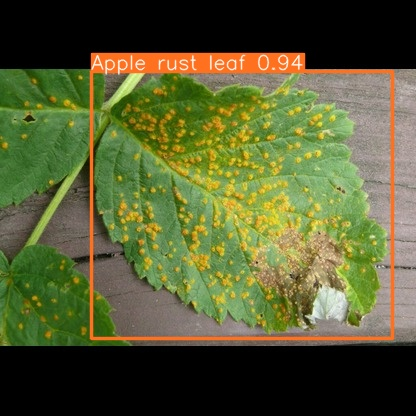

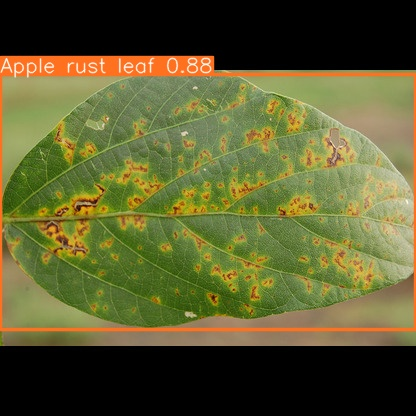

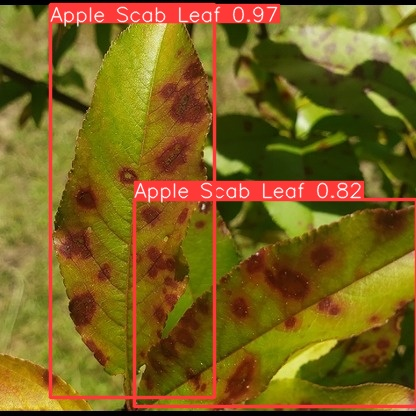

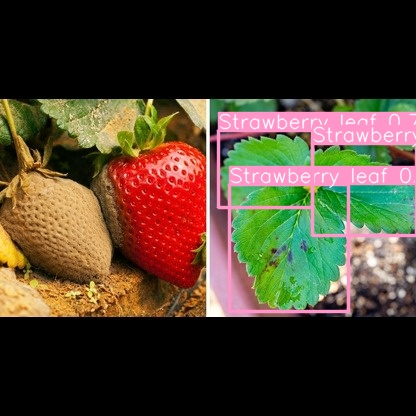

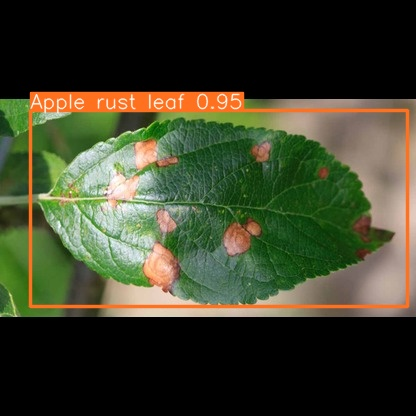

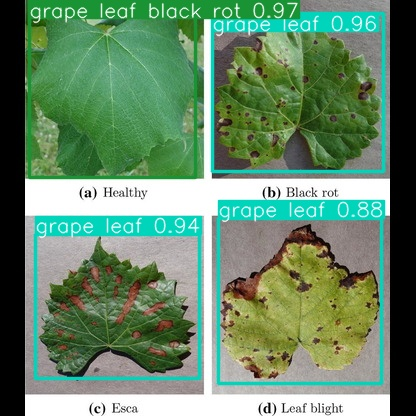

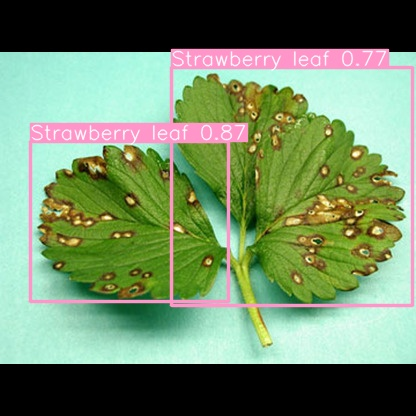

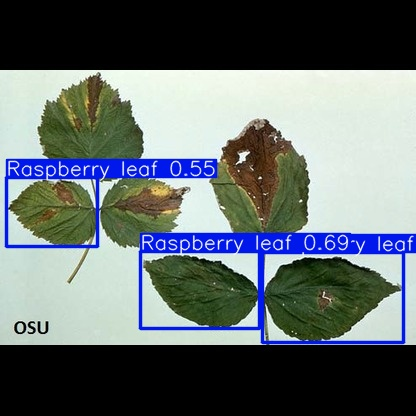

In [9]:
from IPython.display import Image, display

# Define the folder path
output_folder = '/content/runs/detect/predict'

# List all image files in the folder
image_files = [f for f in os.listdir(output_folder) if f.endswith(('.jpg', '.png'))]

# Display each image
for image_file in image_files:
    image_path = os.path.join(output_folder, image_file)
    display(Image(filename=image_path))


### **Copy the inference results to the output folder**

In [10]:
!cp -r /content/runs/detect/predict /content/yolov8/output

### **Adding outputs to zip files**

In [11]:
import os
import zipfile
import shutil

directory = '/content/yolov8/output/predict'
zip_filename = '/content/yolov8/output_test_images.zip'
dest_folder = '/content/drive/MyDrive/yolov8'

with zipfile.ZipFile(zip_filename, 'w') as zipf:
    [zipf.write(os.path.join(directory, f), f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

os.makedirs(dest_folder, exist_ok=True)
shutil.copy2(zip_filename, dest_folder)

directory2 = '/content/drive/MyDrive/yolov8/training_results/leave_deseases2'
zip_filename2 = '/content/yolov8/training_results.zip'

with zipfile.ZipFile(zip_filename2, 'w') as zipf:
    [zipf.write(os.path.join(directory2, f), f) for f in os.listdir(directory2) if os.path.isfile(os.path.join(directory2, f))]

os.makedirs(dest_folder, exist_ok=True)
shutil.copy2(zip_filename2, dest_folder)

'/content/drive/MyDrive/yolov8/training_results.zip'

### **Evaluating the process**

In [12]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolov8/training_results/leave_deseases2/weights/best.pt conf=0.35 data=/content/yolov8/data.yaml

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137194 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/yolov8/test/labels.cache... 239 images, 1 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:04<00:00,  3.30it/s]
                   all        239        454      0.572      0.583      0.613      0.515
       Apple Scab Leaf        239         13      0.538      0.538       0.57      0.461
            Apple leaf        239         10      0.233        0.7       0.68      0.526
       Apple rust leaf        239         11      0.625      0.455      0.625      0.547
 Bell_pepper leaf spot        239         11        0.5      0.727      0.664      0.575
      Bell_pepper leaf        239         15        0.6        0.4      0.502      0.439
        Blueberry leaf        239         22      0.

### **Calculate overall mAP Value**

In [20]:
# Replace these values with your actual class-wise mAP values
class_map_values = [0.85, 0.80, 0.92, 0.7, 0.55]

# Calculate the overall mAP as a percentage
overall_mAP = sum(class_map_values) / len(class_map_values) * 100

print(f"Overall mAP: {overall_mAP:.2f}%")

Overall mAP: 76.40%
